# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# Optional: Download data for AWS computing

In [ ]:
import os
import zipfile
from urllib.request import urlretrieve
def download(url, file):
    """
    Download file from <url>
    :param url: URL to file
    :param file: Local file path
    """
    if not os.path.isfile(file):
        print('Downloading ' + file + '...')
        urlretrieve(url, file)
        print('Download Finished')
download('https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip','traffic_sign.zip')

zip = zipfile.ZipFile('D:/NanoDegree/CarND-TensorFlow-Lab-master/CarND-TensorFlow-Lab-master/traffic_sign.zip')
zip.extractall('D:/NanoDegree/CarND-TensorFlow-Lab-master/CarND-TensorFlow-Lab-master/traffic-sign-data')

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

small_training_file = "traffic-signs-data/small_train_traffic.p"

small_testing_file = "traffic-signs-data/small_test_traffic.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#small dataset is from Keras lession, just testing for fun
with open(small_training_file, mode='rb') as f:
    small_train = pickle.load(f)
with open(small_testing_file, mode='rb') as f:
    small_test = pickle.load(f)

# X_train size : 34799 x 32x32x3
# y_train size : 34799 x 1
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

S_train, s_train = small_train['features'], small_train['labels']

S_test, s_test = small_test['features'], small_test['labels']
# make sure all of train, valid and test data have same number of the images and labels

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

assert(len(S_train) == len(s_train))
assert(len(S_test) == len(s_test))

print()
print(f"Image Shape: {X_train[0].shape}")
print(f"Training Set:   {len(X_train)}")
print(f"Validation Set: {len(X_valid)}")
print(f"Test Set:       {len(X_test)}")
print()
print(f"Image Shape: {S_train[0].shape}")
print(f"Training Set:   {len(S_train)}")
print(f"Test Set:       {len(S_test)}")


Image Shape: (32, 32, 3)
Training Set:   34799
Validation Set: 4410
Test Set:       12630

Image Shape: (32, 32, 3)
Training Set:   100
Test Set:       20


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import matplotlib.pyplot as plt
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.

#import pandas to read the csv file
import pandas as pd

#the local location of the csv file in my computer
Location = r'D:\NanoDegree\CarND-Traffic-Sign-Classifier-Project-master\signnames.csv'

# read the csv file
sign_names = pd.read_csv(Location)

# 0 indicating rows while 1 column
n_classes = sign_names.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

sign_names

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Display all 43 different classes of representative traffic signs. Our initial judgment about these signs is that color may not play a big role in diffirentiating them because basically colors do not decide their sign meanings. 

In addition, the overall quality of the images is not good enough , and some of them are pretty dark and hardly visible. 

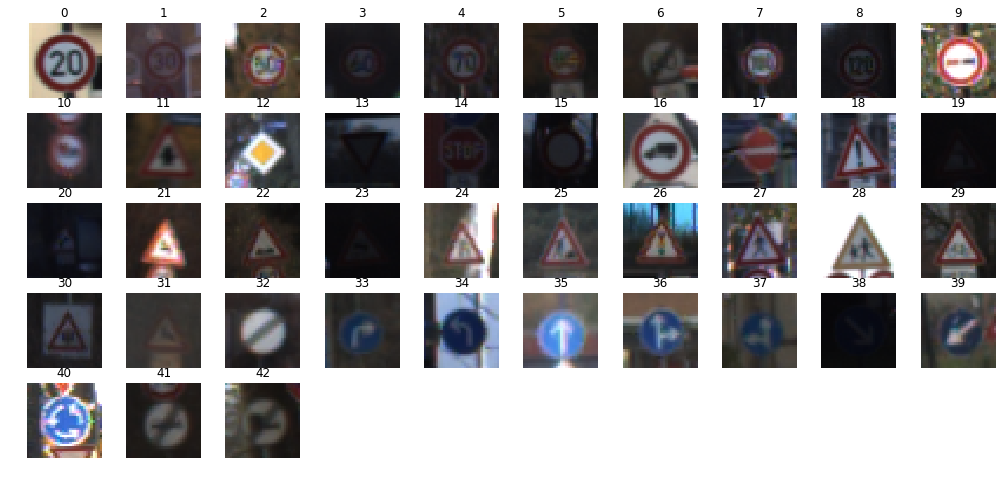

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

sign_set = []
fig=plt.figure(figsize=(17.5,8))
for i in range(43):
    index = 0
    while (y_train[index] != i):
        index = index + 1
    image = X_train[index]
    sign_set.append(image)
    fig.add_subplot(5,10,i+1)
    plt.axis('off')
    plt.title(f'{i}')
    plt.imshow(image)
    
# store all 43 kinds of repreentative images for future use
sign_set = np.array(sign_set)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 

# First trial is to keep 3 color channels, if accuracy not satisfied enough, then grayscale the images.

def normalize_image(image):
    """
    First use images with 3 color channels to see its performance. These additional depths may generate
    better results, depending on if these traffic signs really use different color to discriminate some of them.
    """
    image_copy = np.copy(image)
    
    #in each color channel, 0 = black, and 255 = white
    black = 0
    #rescale white from 255 to 1
    white = 255
    
    norm_black = 0.0
    norm_white = 1.0
    #inital normalized color parameters
    
    image_copy = image_copy[:,:]/256
   
    return image_copy

### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

X_train = normalize_image(X_train)
X_valid = normalize_image(X_valid)
X_test = normalize_image(X_test)



## Compare the original and processed image to make sure they are not changed.

Orignial and normalizedly processed images look close


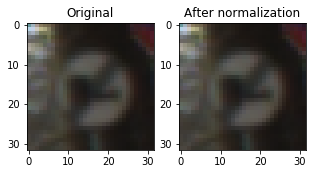

In [7]:
# Compared 

plt.figure(figsize=(5,5)) 
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(image)
norm_image = X_train[index]
plt.subplot(1,2,2)
plt.title('After normalization')
plt.imshow(norm_image)
print('Orignial and normalizedly processed images look close')

* One-hot encode process for Labels

In [8]:
# check the data type of the label
type(y_test[9])

#the labels are already numbers, not string, thus no need to convert. 

numpy.uint8

In [9]:
# reserve for later

### Model Architecture

#### The following codes were referring to LeNet-5 with necessary modifications

# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## The table below shows the layers and their dimensions in this program:

In [10]:
#the local location of the csv file in my computer
Location1 = r'D:\NanoDegree\CarND-Traffic-Sign-Classifier-Project-master\CNN Architecture.csv'

# read the csv file
layers_table = pd.read_csv(Location1)

layers_table

,Input Shape,Layer
0,batch_sizex32x32x3,Convolution 5x5x3x10
1,batch_sizex28x28x10,"Max Pooling (valid, strides = 1x2x2x1)"
2,batch_sizex14x14x10,Activation (ReLU)
3,batch_sizex14x14x10,"Convolution (valid, 5x5x1x30)"
4,batch_sizex10x10x30,"Max Pooling (valid,strides = 1x2x2x1)"
5,batch_sizex5x5x30,Activation (ReLU)
6,batch_sizex5x5x30,Flatten
7,batch_sizex750,Full-connected layer(750x120)
8,batch_sizex120,Activation (ReLU)
9,batch_sizex120,Full-connected layer (120x43)


## TensorFlow setup

In [11]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 128

D:\Anaconda3\envs\carnd-term1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # note: input dimension ("batch_size", height, width, depth)
    # Layer 1: Convolutional. Input = "batch_size"x32x32x3. Output = "batch_size"x28x28x6.
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    c1_w = tf.Variable(tf.truncated_normal(shape=(5,5,3,10),mean = mu, stddev = sigma))
    c1_b = tf.Variable(tf.zeros(10))
    #Set the stride for each dimension (batch_size, height, width, depth)
    c1   = tf.nn.conv2d(x, c1_w, strides = [1,1,1,1], padding ='VALID') + c1_b
    # TODO: Activation.
    
    c1 = tf.nn.relu(c1)

    # Pooling. Input = "batch_size"x28x28x6. Output = "batch_size"x14x14x6.
    c1 = tf.nn.max_pool(c1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    #Set the ksize (filter size) for each dimension (batch_size, height, width, depth)
    #Set the stride for each dimension (batch_size, height, width, depth)


    # Layer 2: Convolutional, input "batch_size"x14x14x6, Output = "batch_size"x10x10x16.
    c2_w = tf.Variable(tf.truncated_normal((5,5,10,30),mean=mu,stddev=sigma))
    c2_b = tf.Variable(tf.zeros(30))
    c2   = tf.nn.conv2d(c1, c2_w, strides = [1,1,1,1],padding = 'VALID') + c2_b
    
    # Activation.
    c2 = tf.nn.relu(c2)
    # Pooling. Input = "batch_size"x10x10x16. Output = "batch_size"x5x5x16.    
    c2 = tf.nn.max_pool(c2,ksize = [1,2,2,1],strides = [1,2,2,1], padding = 'VALID')

    # Flatten. Input = "batch_size"x5x5x16. Output = "batch_size"x400.
    flatten0 = flatten(c2)
    
    # Layer 3: Fully Connected. Input = "batch_size"x400. Output = "batch_size"x120.
    flatten1_w = tf.Variable(tf.truncated_normal(shape=(750,200), mean = mu, stddev = sigma))
    flatten1_b = tf.Variable(tf.zeros(200))
    flatten1 = tf.matmul(flatten0, flatten1_w) + flatten1_b
    
    # Activation.
    flatten1 = tf.nn.relu(flatten1)

    # Layer 4: Fully Connected. Input = "batch_size"x120. Output = "batch_size"x86.
    flatten2_w = tf.Variable(tf.truncated_normal(shape=(200,120), mean = mu, stddev = sigma))
    flatten2_b = tf.Variable(tf.zeros(120))
    flatten2 = tf.matmul(flatten1, flatten2_w) + flatten2_b
    # Activation.
    flatten2 = tf.nn.relu(flatten2)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    flatten3_w = tf.Variable(tf.truncated_normal(shape=(120,43), mean = mu, stddev = sigma))
    flatten3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(flatten2, flatten3_w) + flatten3_b
    
    return logits

### Shuffle the training data.

In [13]:
from sklearn.utils import shuffle

#every row of X_train and y_train are aligned when shuffle 

X_train, y_train = shuffle(X_train, y_train)

## Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline

In [15]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
#logits' dimension = batch_size x 10
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        train_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.779
Validation Accuracy = 0.663

EPOCH 2 ...
Train Accuracy = 0.910
Validation Accuracy = 0.798

EPOCH 3 ...
Train Accuracy = 0.950
Validation Accuracy = 0.836

EPOCH 4 ...
Train Accuracy = 0.976
Validation Accuracy = 0.861

EPOCH 5 ...
Train Accuracy = 0.977
Validation Accuracy = 0.866

EPOCH 6 ...
Train Accuracy = 0.984
Validation Accuracy = 0.873

EPOCH 7 ...
Train Accuracy = 0.969
Validation Accuracy = 0.856

EPOCH 8 ...
Train Accuracy = 0.981
Validation Accuracy = 0.867

EPOCH 9 ...
Train Accuracy = 0.982
Validation Accuracy = 0.881

EPOCH 10 ...
Train Accuracy = 0.994
Validation Accuracy = 0.890

EPOCH 11 ...
Train Accuracy = 0.990
Validation Accuracy = 0.896

EPOCH 12 ...
Train Accuracy = 0.985
Validation Accuracy = 0.878

EPOCH 13 ...
Train Accuracy = 0.993
Validation Accuracy = 0.904

EPOCH 14 ...
Train Accuracy = 0.992
Validation Accuracy = 0.903

EPOCH 15 ...
Train Accuracy = 0.992
Validation Accuracy = 0.892

EPOCH 16 ...
Train Ac

## Observations based on multiple trials: 

### 1. First trial used epoch = 20, convolution1 dimension = (5,5,3,6), convolution2 dimension = (5,5,3,16) and drop out =0.75, and the results looked underfitting (90% accuracy). 

### 2. Second trial used epoch = 20, convolution dimension = (5,5,3,8), convolution2 dimension = (5,5,3,20) and drop out =0.85, and the results looked underfitting too (92% accuracy). 

### 3.Third trial used epoch = 50, convolution dimension = (5,5,3,10), convolution2 dimension = (5,5,3,30) and drop out =1 (no dropout), and the results looked better (96% accuracy).


## Dropout regularization process

#### These codes were used to investigate the parameters' impact on final accuracy, and they were not executed in the submission version.

In [16]:
### For Trial only

from tensorflow.contrib.layers import flatten

def LeNet_x(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    keep_prob = 0.925
    mu = 0
    sigma = 0.1
    # note: input dimension ("batch_size", height, width, depth)
    # Layer 1: Convolutional. Input = "batch_size"x32x32x3. Output = "batch_size"x28x28x6.
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    c1_w = tf.Variable(tf.truncated_normal(shape=(5,5,3,8),mean = mu, stddev = sigma))
    c1_b = tf.Variable(tf.zeros(8))
    #Set the stride for each dimension (batch_size, height, width, depth)
    c1   = tf.nn.conv2d(x, c1_w, strides = [1,1,1,1], padding ='VALID') + c1_b
    # TODO: Activation.
    
    c1 = tf.nn.relu(c1)
    c1 = tf.nn.dropout(c1, keep_prob)

    # Pooling. Input = "batch_size"x28x28x6. Output = "batch_size"x14x14x6.
    c1 = tf.nn.max_pool(c1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    #Set the ksize (filter size) for each dimension (batch_size, height, width, depth)
    #Set the stride for each dimension (batch_size, height, width, depth)


    # Layer 2: Convolutional, input "batch_size"x14x14x6, Output = "batch_size"x10x10x16.
    c2_w = tf.Variable(tf.truncated_normal((5,5,8,20),mean=mu,stddev=sigma))
    c2_b = tf.Variable(tf.zeros(20))
    c2   = tf.nn.conv2d(c1, c2_w, strides = [1,1,1,1],padding = 'VALID') + c2_b
    
    # Activation.
    c2 = tf.nn.relu(c2)
    c2 = tf.nn.dropout(c2, keep_prob)
    # Pooling. Input = "batch_size"x10x10x16. Output = "batch_size"x5x5x16.    
    c2 = tf.nn.max_pool(c2,ksize = [1,2,2,1],strides = [1,2,2,1], padding = 'VALID')

    # Flatten. Input = "batch_size"x5x5x16. Output = "batch_size"x400.
    flatten0 = flatten(c2)
    
    # Layer 3: Fully Connected. Input = "batch_size"x400. Output = "batch_size"x120.
    flatten1_w = tf.Variable(tf.truncated_normal(shape=(500,120), mean = mu, stddev = sigma))
    flatten1_b = tf.Variable(tf.zeros(120))
    flatten1 = tf.matmul(flatten0, flatten1_w) + flatten1_b
    
    # Activation.
    flatten1 = tf.nn.relu(flatten1)
    flatten1 = tf.nn.dropout(flatten1, keep_prob)

    # Layer 4: Fully Connected. Input = "batch_size"x120. Output = "batch_size"x86.
    flatten2_w = tf.Variable(tf.truncated_normal(shape=(120,86), mean = mu, stddev = sigma))
    flatten2_b = tf.Variable(tf.zeros(86))
    flatten2 = tf.matmul(flatten1, flatten2_w) + flatten2_b
    # Activation.
    flatten2 = tf.nn.relu(flatten2)
    flatten2 = tf.nn.dropout(flatten2, keep_prob)
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    flatten3_w = tf.Variable(tf.truncated_normal(shape=(86,43), mean = mu, stddev = sigma))
    flatten3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(flatten2, flatten3_w) + flatten3_b
    
    return logits

### For Trial only

## Evaluating the model accuracy using test data

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.922


In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(S_train, s_train)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.990


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

resize all irregular images to 32x32 dimensions

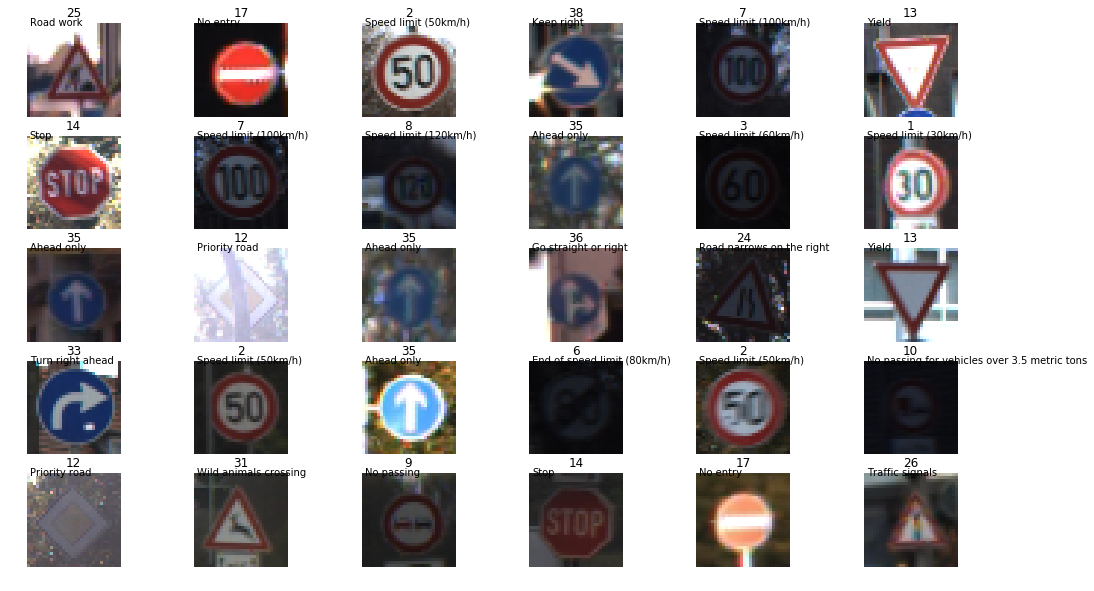

In [85]:
# randomly select 30 images from German traffic sign database

# Visualizations will be shown in the notebook.
import cv2

new_image_set = []

new_image_labels = [25,17,2,38,7,13,14,7,8,35,3,1,35,12,35,36,24,13,33,2,35,6,2,10,12,31,9,14,17,26]

for i in range(30):
    img = plt.imread(f'D:/NanoDegree/CarND-Traffic-Sign-Classifier-Project-master/GTSRB_randomly_selected_Images/00{462+i}.ppm')
    img_resize = cv2.resize(img,(32,32))
    new_image_set.append(img_resize)

new_image_set = np.asarray(new_image_set)
fig=plt.figure(figsize=(17.5,10))
for i in range(30):
    image = new_image_set[i]
    fig.add_subplot(5,6,i+1)
    plt.axis('off')
    plt.title(new_image_labels[i])
    plt.text(0.5,0.5,sign_names['SignName'][new_image_labels[i]])
    plt.imshow(image)
plt.show()

### Identify characteristics of the new images that might make it difficult for the model to classify.

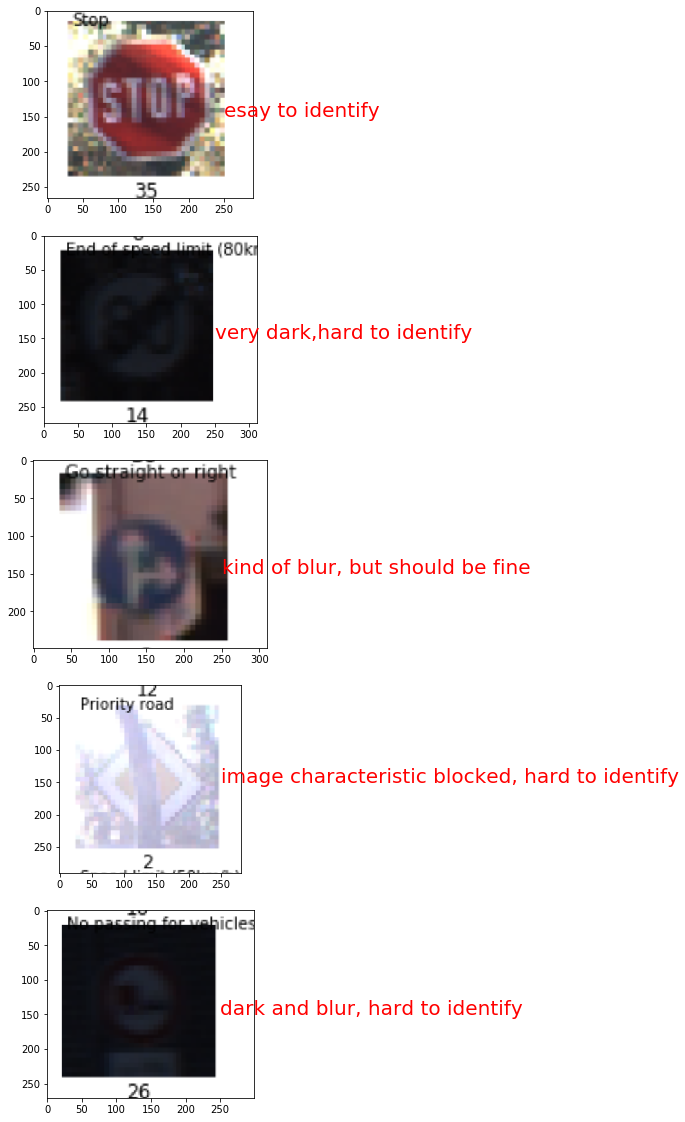

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
stop = plt.imread('stop.png')
end80 = plt.imread('end limit 80.png')
gostraight = plt.imread('go straight or right.png')
priority = plt.imread('Priority road.png')
nopassing = plt.imread('no passing.png')
ax1 = plt.subplot(5,1,1)
plt.imshow(stop)
ax1.text (250,150, 'esay to identify',color = 'red', fontsize = 20)
ax2= plt.subplot(5,1,2)
plt.imshow(end80)
ax2.text (250,150, 'very dark,hard to identify',color = 'red', fontsize = 20)
ax3 = plt.subplot(5,1,3)
plt.imshow(gostraight)
ax3.text (250,150, 'kind of blur, but should be fine',color = 'red', fontsize = 20)
ax4 = plt.subplot(5,1,4)
plt.imshow(priority)
ax4.text (250,150, 'image characteristic blocked, hard to identify',color = 'red', fontsize = 20)
ax5 = plt.subplot(5,1,5)
plt.imshow(nopassing)
ax5.text (250,150, 'dark and blur, hard to identify',color = 'red', fontsize = 20)
print()

### Predict the Sign Type for Each Image

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [98]:
new_images = normalize_image(new_image_set)


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predict = sess.run(tf.argmax(logits, 1), feed_dict={x: new_images})
        #new_images_accuracy = evaluate(new_images, new_image_labels)
     
    test_accuracy = evaluate(new_images, new_image_labels)
    print("Total Accuracy = {:.3f}".format(test_accuracy))
    print("Detailed results are shown below: ")
    print()
    print('Predict   vs    True')
    for i in range(30):
         print(sign_names['SignName'].iloc[predict[i]],' : ' ,sign_names['SignName'].iloc[new_image_labels[i]])   

INFO:tensorflow:Restoring parameters from .\lenet
Total Accuracy = 0.967
Detailed results are shown below: 

Predict   vs    True
Road work  :  Road work
No entry  :  No entry
Speed limit (50km/h)  :  Speed limit (50km/h)
Keep right  :  Keep right
Speed limit (100km/h)  :  Speed limit (100km/h)
Yield  :  Yield
Stop  :  Stop
Speed limit (100km/h)  :  Speed limit (100km/h)
Speed limit (120km/h)  :  Speed limit (120km/h)
Ahead only  :  Ahead only
Speed limit (60km/h)  :  Speed limit (60km/h)
Speed limit (30km/h)  :  Speed limit (30km/h)
Ahead only  :  Ahead only
Roundabout mandatory  :  Priority road
Ahead only  :  Ahead only
Go straight or right  :  Go straight or right
Road narrows on the right  :  Road narrows on the right
Yield  :  Yield
Turn right ahead  :  Turn right ahead
Speed limit (50km/h)  :  Speed limit (50km/h)
Ahead only  :  Ahead only
End of speed limit (80km/h)  :  End of speed limit (80km/h)
Speed limit (50km/h)  :  Speed limit (50km/h)
No passing for vehicles over 3.5 me

### Analyze Performance

#### The total accuray of randomly selecting 30 images from German traffic sign database is 96.7%, which is very promising.

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from .\lenet


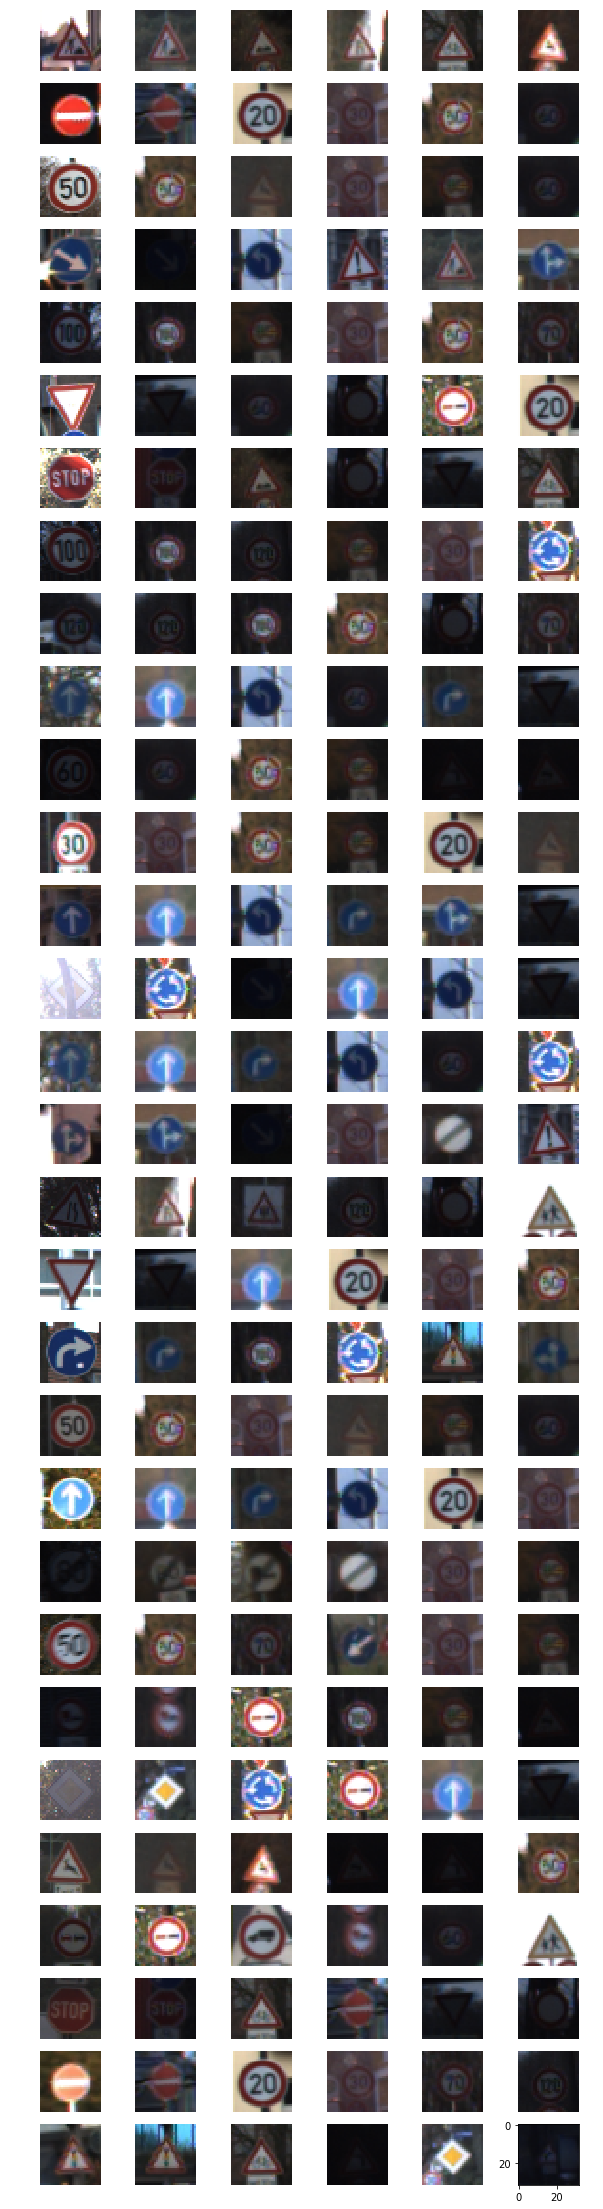

In [146]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: new_images})
    
    #print(top5.indices)
    
#print(top5.indices[0][2])

fig=plt.figure(figsize=(10,40))

for i in range(30):
    for j in range(5):
        if j == 0:
            
            fig.add_subplot(30,6,i*6+j+1)
            image = new_image_set[i]
            plt.axis('off')
            plt.imshow(image)
            fig.add_subplot(30,6,i*6+j+2)
            plt.imshow(sign_set[top5.indices[i][j]])
        else:
            plt.axis('off')
            fig.add_subplot(30,6,i*6+j+2)
            plt.imshow(sign_set[top5.indices[i][j]])

    


# Model Accuracy Improvement

### Experiment with different network architectures, or just change the dimensions of the LeNet layers
### Add regularization features like dropout or L2 regularization
### Tune the hyperparameters
### Improve the data pre-processing
### Augment the training data by roatating or shifting images or changing colors

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")